<a href="https://colab.research.google.com/github/Fer-Souza29/imersao_python_analise_Alura/blob/main/Imers%C3%A3o_Python_aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalando a biblioteca mplfinance para visualização de dados financeiros.
# mplfinance é uma ferramenta útil para criar gráficos de candlestick e outras representações de dados financeiros.
!pip install mplfinance

In [4]:
# Importa a biblioteca pandas para manipulação de dados.
import pandas as pd

# Importa a biblioteca matplotlib para visualização de dados.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importa a biblioteca mplfinance para gráficos financeiros.
import mplfinance as mpf

# Importa a biblioteca yfinance para obtenção de dados financeiros.
import yfinance as yf

# Importa as bibliotecas plotly para visualização interativa de dados.
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
# Utiliza a biblioteca yfinance para baixar dados históricos da ação PETR4.SA
# O parâmetro 'start' define a data de início dos dados (1º de janeiro de 2023 neste caso).
# O parâmetro 'end' define a data final dos dados (31 de dezembro de 2023 neste caso).

dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

# Mostra os dados obtidos pela função yf.download()
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.514351,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.096447,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.608019,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.206049,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.105179,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,33.934216,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,34.260597,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,34.810783,23466800


In [11]:
# Acessa o atributo 'columns' do DataFrame 'dados' para listar as colunas disponíveis nos dados.

dados.columns

Index(['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume'], dtype='object')

In [12]:
# Atribui novos nomes às colunas do DataFrame 'dados' para melhorar a legibilidade e compreensão.
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
dados.columns

Index(['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume'], dtype='object')

In [13]:
# Renomeia o índice do DataFrame 'dados' para 'Data' para melhorar a identificação dos registros.

dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.514351,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.096447,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.608019,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.206049,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.105179,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,33.934216,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,34.260597,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,34.810783,23466800


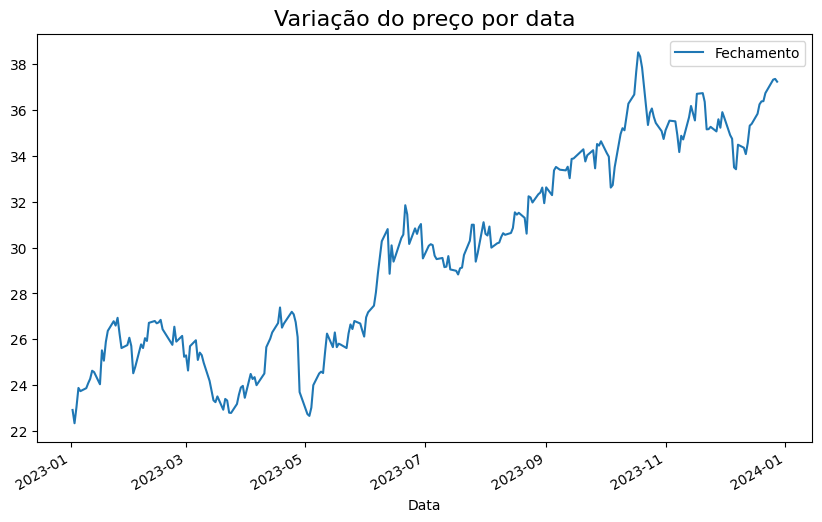

In [15]:
# Plota um gráfico da variação do preço de fechamento ao longo do tempo utilizando a coluna 'Fechamento' do DataFrame 'dados'.
dados['Fechamento'].plot(figsize =(10, 6))
# Adiciona um título ao gráfico para descrever o que está sendo visualizado.
plt.title('Variação do preço por data', fontsize=16)
# Adiciona uma legenda ao gráfico para indicar o que a linha representa.

plt.legend(['Fechamento'])

In [17]:
df = dados.head(60).copy()
# Convertendo o índice em uma coluna de data.
df['Data'] = df.index
# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,16.514351,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,16.096447,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,16.608019,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,17.206049,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,17.105179,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,17.198847,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,17.357361,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,17.494263,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,17.746443,58130000,19369.0


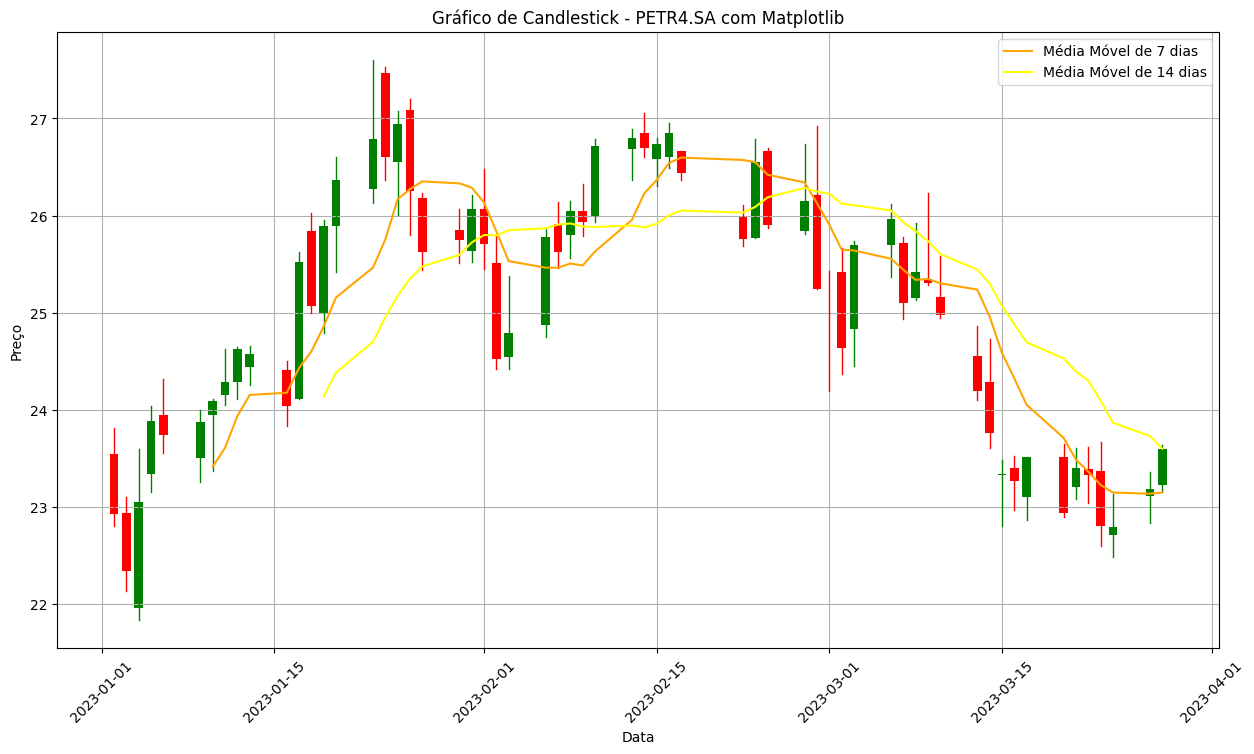

In [20]:
# Cria uma figura e eixo para o gráfico com tamanho especificado.
fig, ax = plt.subplots(figsize=(15, 8))

# Largura das barras no gráfico.
width = 0.7

# Loop para plotar os candlesticks e as barras de abertura-fechamento.
for i in range(len(df)):
    # Determina a cor do candlestick com base na diferença entre Fechamento e Abertura.
    color = 'green' if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i] else 'red'

    # Plotagem do candlestick e da barra de abertura-fechamento.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]], [df['Minimo'].iloc[i], df['Maximo'].iloc[i]], color=color, linewidth=1)
    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width, abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

# Cálculo e plotagem das médias móveis de 7 e 14 dias.
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel de 7 dias')
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel de 14 dias')

# Adiciona a legenda ao gráfico.
ax.legend()

# Formatação do eixo x para exibir as datas corretamente.
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotação dos rótulos do eixo x para melhorar a legibilidade.
plt.xticks(rotation=45)

# Título e rótulos dos eixos do gráfico.
plt.title("Gráfico de Candlestick - PETR4.SA com Matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Habilita a grade no gráfico.
plt.grid(True)

# Exibe o gráfico.
plt.show()



In [22]:
# Cria um subplot com duas linhas e uma coluna, compartilhando o eixo x.
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

# Adiciona o gráfico de candlestick ao primeiro subplot.
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
              row=1, col=1)

# Adiciona as médias móveis ao primeiro subplot.
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
              row=1, col=1)

# Adiciona o gráfico de barras de volume ao segundo subplot.
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
              row=2, col=1)

# Atualiza o layout do gráfico.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,
                  width=1100, height=600)

# Exibe o gráfico.
fig.show()


[*********************100%%**********************]  1 of 1 completed


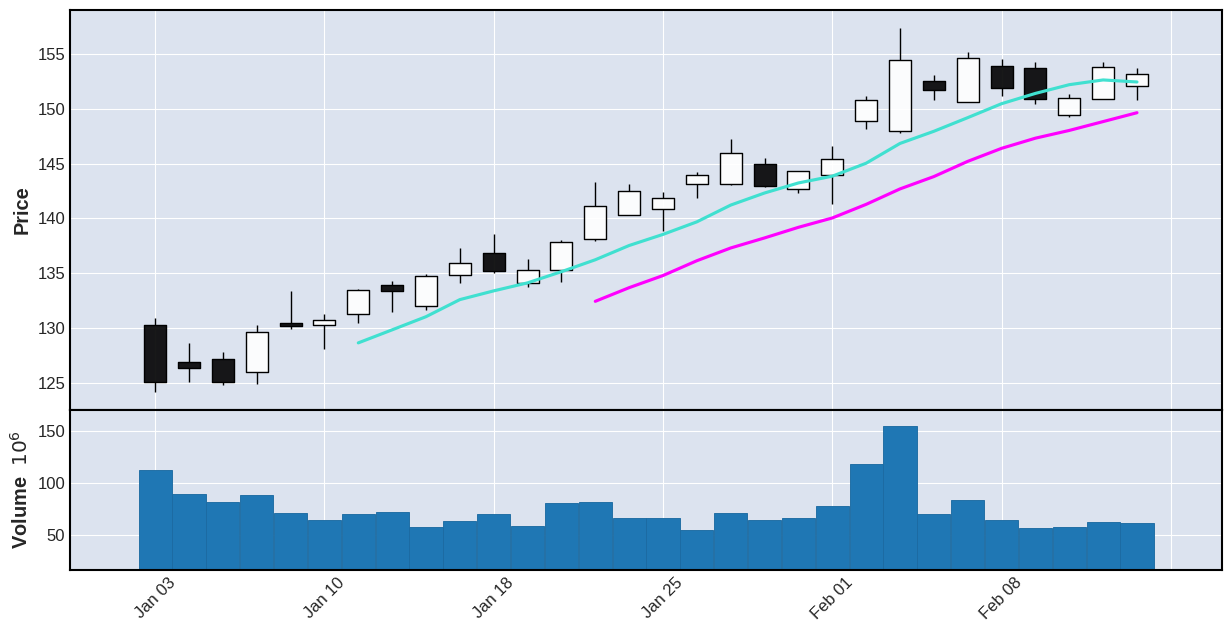

In [24]:
#desafio Apple
# Plota um gráfico de candlestick para as primeiras 30 linhas dos dados, incluindo volume e médias móveis com dados de ações da Apple.

dadosdesafio = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
mpf.plot(dadosdesafio.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14))